In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(gridlines=':')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from reversi import *

In [4]:
b = Board()
b.stash()
print b.legal_moves()
print b.move(0,3)
print b.move(2,3)
print b.move(2,2)
print b.move(3,2)
print b
print b.legal_moves()

[(2, 3), (3, 2), (4, 5), (5, 4)]
False
True
True
True
Score: B=5, W=2
Next turn: W [◎]
  01234567
0 ........
1 ........
2 ..◎◉....
3 ..◉◉◉...
4 ...◉◎...
5 ........
6 ........
7 ........
[(2, 4), (4, 2)]


### Performance profiling

In [40]:
%%time
%%prun
g = Game(playerB=Player_Random(), playerW=Player_Random())
scores = np.array([g.play(reset=True) for _ in range(5)])

 CPU times: user 284 ms, sys: 0 ns, total: 284 ms
Wall time: 275 ms


In [195]:
g = Game(playerB=Player_Random(), playerW=Player_Random())
%lprun -f Board.move scores = np.array([g.play(reset=True) for _ in range(5)])

### Human Player

In [ ]:
g = Game(playerB=Player_Human(), playerW=Player_Weighted())
g.play()

### Greedy vs Random

In [7]:
%%time
g = Game(playerB=Player_Greedy(), playerW=Player_Random())
scores = np.array([g.play(reset=True) for _ in range(200)])

TypeError: super(type, obj): obj must be an instance or subtype of type

Black wins: 125/200


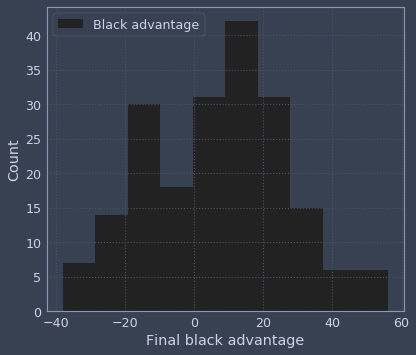

In [183]:
b_wins = np.count_nonzero(scores[:, 0] > scores[:, 1])
total_games = len(scores)
print 'Black wins: %d/%d' % (b_wins, total_games)

plt.hist(scores[:, 0] - scores[:, 1], label='Black advantage', color='k')
plt.legend()
plt.xlabel('Final black advantage')
plt.ylabel('Count');

### Random vs Greedy

In [184]:
%%time
g = Game(playerB=Player_Random(), playerW=Player_Greedy())
scores = np.array([g.play(reset=True) for _ in range(200)])

CPU times: user 14.5 s, sys: 0 ns, total: 14.5 s
Wall time: 14.5 s


Black wins: 80/200


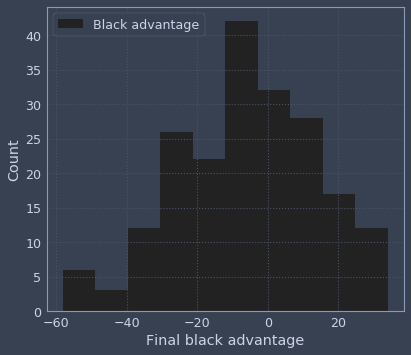

In [185]:
b_wins = np.count_nonzero(scores[:, 0] > scores[:, 1])
total_games = len(scores)
print 'Black wins: %d/%d' % (b_wins, total_games)

plt.hist(scores[:, 0] - scores[:, 1], label='Black advantage', color='k')
plt.legend()
plt.xlabel('Final black advantage')
plt.ylabel('Count');

### Random vs Weighted

In [186]:
%%time
g = Game(playerB=Player_Random(), playerW=Player_Weighted())
scores = np.array([g.play(reset=True) for _ in range(200)])

CPU times: user 13.7 s, sys: 84 ms, total: 13.8 s
Wall time: 13.7 s


Black wins: 16/200


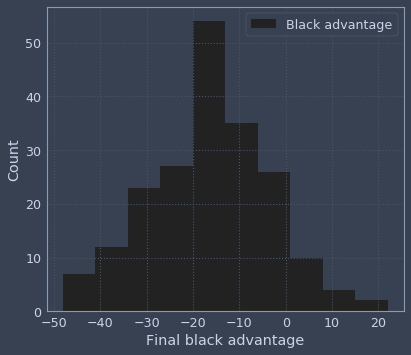

In [187]:
b_wins = np.count_nonzero(scores[:, 0] > scores[:, 1])
total_games = len(scores)
print 'Black wins: %d/%d' % (b_wins, total_games)

plt.hist(scores[:, 0] - scores[:, 1], label='Black advantage', color='k')
plt.legend()
plt.xlabel('Final black advantage')
plt.ylabel('Count');

### Weighted vs Greedy

In [188]:
%%time
g = Game(playerB=Player_Weighted(), playerW=Player_Greedy())
scores = np.array([g.play(reset=True) for _ in range(10)])

CPU times: user 864 ms, sys: 108 ms, total: 972 ms
Wall time: 866 ms


Black wins: 10/10


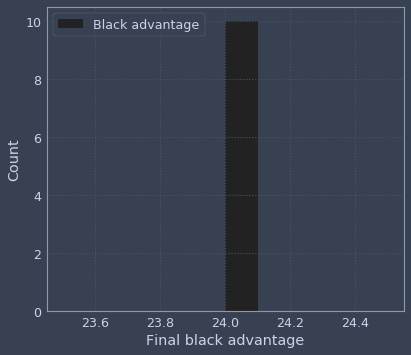

In [189]:
b_wins = np.count_nonzero(scores[:, 0] > scores[:, 1])
total_games = len(scores)
print 'Black wins: %d/%d' % (b_wins, total_games)

plt.hist(scores[:, 0] - scores[:, 1], label='Black advantage', color='k')
plt.legend()
plt.xlabel('Final black advantage')
plt.ylabel('Count');

### Weighted vs Random

In [192]:
%%time
g = Game(playerB=Player_Weighted(), playerW=Player_Random())
scores = np.array([g.play(reset=True) for _ in range(200)])

CPU times: user 13.5 s, sys: 0 ns, total: 13.5 s
Wall time: 13.5 s


Black wins: 164/200


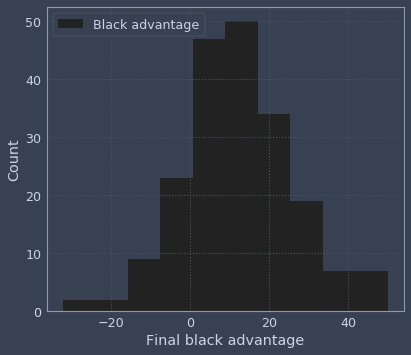

In [193]:
b_wins = np.count_nonzero(scores[:, 0] > scores[:, 1])
total_games = len(scores)
print 'Black wins: %d/%d' % (b_wins, total_games)

plt.hist(scores[:, 0] - scores[:, 1], label='Black advantage', color='k')
plt.legend()
plt.xlabel('Final black advantage')
plt.ylabel('Count');